In [1]:
from preprocessing import *
from main import *
import os
import shutil
shutil.rmtree("model")

In [2]:
# set your device and visible devices, prefer cuda
os.environ["CUDA_VISIBLE_DEVICES"]="2"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'DEVICE: {device}')

# set your parameters based on hyperparameter tuning results
chf_best_params = {'depth': 3, 'grid': 8, 'k': 8, 'lamb': 3.3619635794339965e-07, 'lamb_entropy': 2.078997799175118, 'lr_1': 1.25, 'lr_2': 1.25, 'steps': 20}

# load your dataset from preprocessing
dataset = get_chf(cuda=True)

DEVICE: cuda


In [3]:
# define your NKAN object
chf_kan = NKAN(dataset, 42, device, chf_best_params)

In [4]:
# initialize and train your model
model = chf_kan.get_model()

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.50e-03 | test_loss: 4.64e-03 | reg: 2.29e+01 | : 100%|█| 20/20 [00:18<00:00,  1.09it

saving model version 0.1
Model trained.


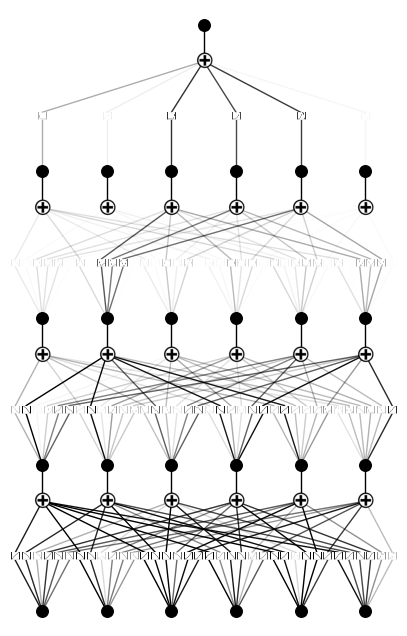

In [5]:
model.plot()

saving model version 0.2


| train_loss: 3.41e-03 | test_loss: 3.16e-03 | reg: 2.25e+01 | : 100%|█| 20/20 [00:19<00:00,  1.04it


saving model version 0.3
saving model version 0.4


| train_loss: 2.04e-03 | test_loss: 2.51e-03 | reg: 2.21e+01 | : 100%|█| 20/20 [00:24<00:00,  1.25s/


saving model version 0.5
saving model version 0.6


| train_loss: 1.56e-03 | test_loss: 2.69e-03 | reg: 2.17e+01 | : 100%|█| 20/20 [00:31<00:00,  1.59s/


saving model version 0.7
saving model version 0.8


| train_loss: 1.58e-03 | test_loss: 2.70e-03 | reg: 2.18e+01 | : 100%|█| 20/20 [00:50<00:00,  2.52s/


saving model version 0.9


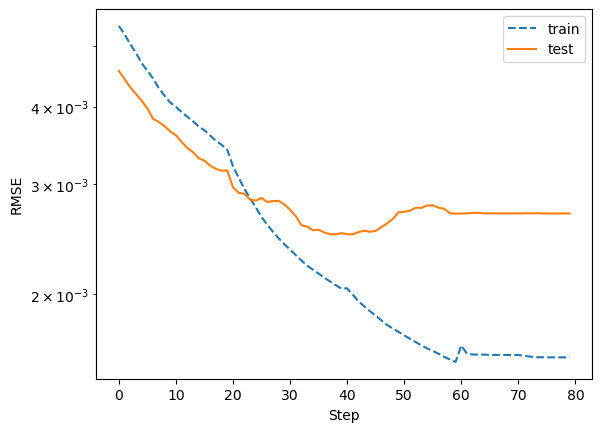

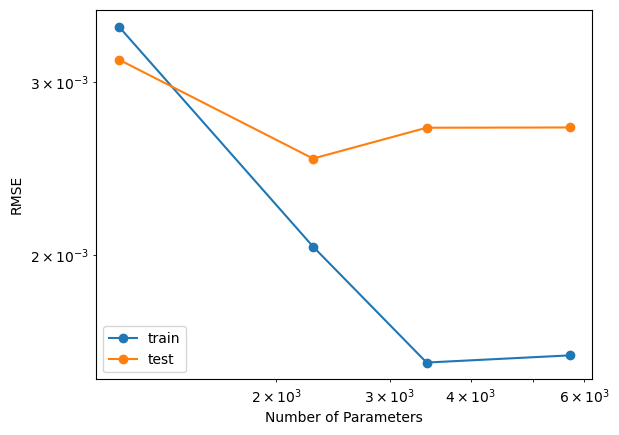

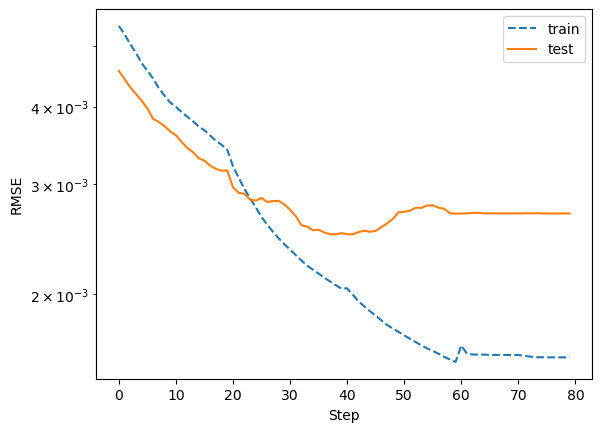

In [6]:
# do a quick refinement loop on your model 
chf_kan.refine(model, grids=[10, 20, 30, 50])

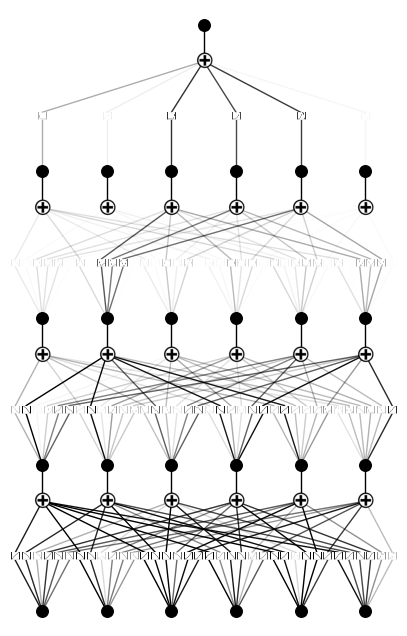

In [7]:
model.plot()

In [8]:
model.prune()

saving model version 0.3


MultKAN(
  (act_fun): ModuleList(
    (0-3): 4 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-3): 4 x Symbolic_KANLayer()
  )
)

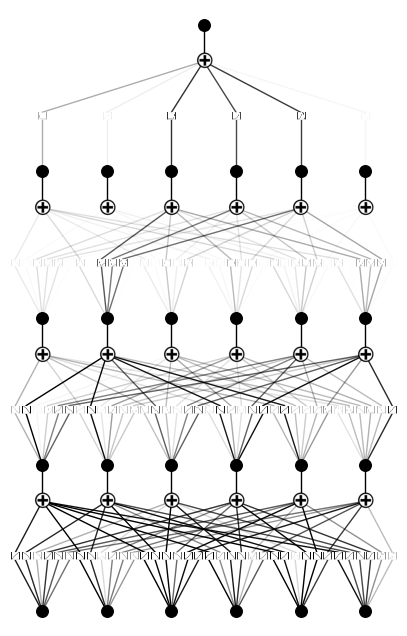

In [9]:
model.plot()

In [12]:
chf_kan.get_metrics(model, 'chf_notebook')

,OUTPUT,MAE,MAPE,MSE,RMSE,RMSPE,R2
0,CHF,132.1756,8.286,41447.3751,203.5863,12.2959,0.9761


In [14]:
chf_kan.get_equation(model, 'chf_notebook', simple=0.5, metrics=True)

skipping (0,0,0) since already symbolic
skipping (0,0,1) since already symbolic
skipping (0,0,2) since already symbolic
skipping (0,0,3) since already symbolic
skipping (0,0,4) since already symbolic
skipping (0,0,5) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,1,1) since already symbolic
skipping (0,1,2) since already symbolic
skipping (0,1,3) since already symbolic
skipping (0,1,4) since already symbolic
skipping (0,1,5) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,2,1) since already symbolic
skipping (0,2,2) since already symbolic
skipping (0,2,3) since already symbolic
skipping (0,2,4) since already symbolic
skipping (0,2,5) since already symbolic
skipping (0,3,0) since already symbolic
skipping (0,3,1) since already symbolic
skipping (0,3,2) since already symbolic
skipping (0,3,3) since already symbolic
skipping (0,3,4) since already symbolic
skipping (0,3,5) since already symbolic
skipping (0,4,0) since already symbolic


KeyboardInterrupt: 